### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2020 ###

# Bykers- Bike Sharing Optimization to Maximize Profitability #

#### Ruohui Wang (ruohui@cs.wisc.edu), Maitreyi More (mdmore@wisc.edu), Rohit Gautam (rgautam@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
  1. [Problem Statement](#1.1.-problem-statement)
  1. [Data](#data)
1. [Mathematical Model](#2.-Mathematical-model)
  1. [Model 1](#Model_1)
  1. [Model 2](#Model_2)
  1. [Model 3](#Model_3)
  1. [Model 4](#Model_4)
  1. [Model 5](#Model_5)
1. [Solution](#3Solution)
  1. [Model 1](#Code_1)
  1. [Model 2](#Code_2)
  1. [Model 3](#Code_3)
  1. [Model 4](#Code_4)
  1. [Model 5](#Code_5)
1. [Results](#4Results)
1. [Future Work](#5Futurework)
1. [Author Contributions](#6Author)
1. [Peer Review Feedback](#7Peer)

<a name="intro"></a>
## 1. Introduction ##

Bike-sharing systems provide a fleet of bikes which can be rented by users to travel in a city. The network essentially consists of bikes and docks which are situated in different places in an area/city. The users can collect a bike from a dock and deposit it at the same or a different dock.

Bikesharing is slowly gaining prevalence due to an increase in interest in reducing pollution, traffic, as well as promoting healthy lifestyles. At present San Francisco has multiple bike-sharing companies such as Bay Wheels and JUMP which have become popular especially in the Bay area and University Towns.

Our project intends to find the optimal distribution of bikes to maximize the profit of a Bike Sharing Company called Bykers.

The positions of the docks are shown below.
<img src="stations.png">

<a name="problem"></a>
## 1.1 Problem Statement ##

The project aims to solve a networking problem for allotment of bikes to docks in the San Francisco Bay area. The demand and average revenue from the source to destination for different pairs of source and destination docks have been used to evaluate what would be the optimal allotment of bikes for maximizing the profit of Bykers.

The rental charges on the bikes are on the basis of the duration of the journey. So a longer journey yields more revenue than the shorter ones. Buying new bikes, setting up the stations, and maintaining the infrastructure involves capital investment. Thus, it is a challenge for the company to figure out how many bikes they should buy, how to allot the bikes to different stations and how to set up their docks.

The solution to the problem can further be extended to other car-sharing companies like Uber and Lyft.

The Bike Sharing Company has a budget of \\$200,000 for bikes and with \\$1000 as the cost for one bike, the maximum investment can be for 200 bikes. 

We have also explored the impact on profits if the company follows differential pricing for "Customers" and "Subscribers" on the given data set.

1) The First Step of the Problem deals with finding the optimum number of bikes to satisfy demand and find out the profit  
2) The Second Step of the Problem deals with finding the optimum number of bikes to satisfy demand and find out the profit using Premium Pricing.  
2) The Third Step of the Problem finds out the optimum placement of bikes to Maximize Profit using Average Demand and Profit 
3) The Fourth Step of the Problem considers the constraint on Dock Size to find out optimal arrangement to Maximize Profit  
4) The Fifth Step includes a cost parameter for the expansion of the Dock to find out optimal allottment to Maximize Profit 

<a name="data"></a>
## 1.2 Data ##

Our data was collected from a case study provided by Bain and Company for a company based in the Bay Area. We utilize two data sets to solve the problem. Data was provided for the number of trips logged from a source to a destination dock everyday over a period of six months from March to August 2015. The total data has 354153 entries for trips.

The first data set consists of 354153 entries for trips arranged sequentially in the following format-

Trip ID | Start Date and Time | Start Station  | End Date and Time | End Station  | Customer or Subscriber  |
---     | ---                 | ---            |          ---      |          --- |          --- |
**ID 1**| Start 1            | Station Start1| End1           |Station End1|Customer or Subscriber|
**ID 2**| Start 2            | Station Start2| End2           |Station End2|Customer or Subscriber|
**...** | ........            | ................| ............     |............. ||............. |




The second data set is the Demand Matrix which provides the Daily Demand from a source to destination dock averaged over a period of 6 months.

Source/Destination | Destination1 | Destination2 |.... |
---                | ---          | ---          | --- |
**Source 1**           | demand11          | demand12          |
**Source 2**           | demand21          | demand22          |
......             | ....         | ...          |

The third data set is the Revenue Matrix which provides the Average Revenue from a source to destination dock averaged over a period of 6 months based on Normal Pricing.

Source/Destination | Destination1 | Destination2 |.... |
---                | ---          | ---          | --- |
**Source 1**           | revenue11          | revenue12          |
**Source 2**           | revenue21          | revenue22          |
......             | ....         | ...          |


<a name="Mathematical-model"></a>
## 2. Mathematical Model ##

<a name="Model_1"></a>
### Model 1: To find the Optimal Number of Bikes and distribution when there is no constraint on bike availability ###
$\textbf{Model Type: Mixed Integer Linear Program}$ 

The Mixed Integer Linear Programming model checks the trip data sequentially to evaluate the optimal number of bikes needed to maximize profit. Trip Data for 10 days have been considered with 10,000 entries. The model has 38 source stations and 49 destination stations spread all over the Bay Area in San Francisco.

The optimal allotment is dependent upon both the demand and the average profit from the destinations.  

$\textbf{Parameters and Assumptions:}$

We are considering the data for only 10000 trips which span over a 10 day period. As the dataset is huge, we run the risk of the algorithm taking too long to give the desired results. Thus, 10000 records are used to find the optimal number of bikes. 

$$ recordLength = 10000$$

The total number of unique stations.

$$ numStations = 69$$

The cost of a bike normalized to one day is \\$1 considering cost of bike as \\$1000 and cost of insurance, taxes etc. with a lifespan of 4 years.

$$ bikeCost = 1 $$

Days in the equation will be 10 as per our consideration of 10000 records.

$$ days = 10 $$

To find out the total requirement of bikes in order to maximize profit, we consider the minimum revenue for each trip i.e.\\$3

$$ revenue = $2 $$

The station from which the trip starts-

$$ tripStart $$

The station at which the trip ends-

$$ tripEnd $$


$\textbf{Assumptions:}$

a)  The tripdata which has been used to find out the number of bikes over a 10 day period required to maximize profit has been assumed to be deterministic in nature and sufficiently represents the real data at any point of time.

b) The revenue from the source to destination dock is deterministic and equal to the average revenue for rides between the stations from March to August 2015. This study considers bikers who use the service regularly and have more or less fixed travel patterns.

c) Bikes are arranged only at the beginning of the day and hence, it is only the initial arrangement of bikes across the station which are available for use.

$\textbf{Decision Variables:}$

The Assignment variable is a binary variable which confirms if a trip is satisfied through the allottment of a bike or not.

$$assignment_{i}= \begin{cases} 
      1 & \text{if bike is allotted for trip i} \\
      0 & \text{otherwise}
   \end{cases}
$$

$$\ \forall \ i \in tripData $$

The numbikes variable tracks whether a bike is initially placed at a station or not with initialization as zero.

$$numbikes_{i} \ \forall \ i \in numStations $$

The numBikesTracked variable keeps count of the total bikes allotted after every trip to a particular station.

$$numBikesTracked_{i} \ \forall \ i \in numStations $$


$\textbf{Constraints:}$

The initial bike alloted is always greater than zero.

$$ numBikesTracked \ge 0 $$


Bikes cannot be removed from an empty station- 

$$ numBikesTracked_{i} \ge 0 \ \forall \ i \in numStations $$

$\textbf{Expressions:}$

The initial number of bikes allotted to stations is zero:

$$ numBikesTracked = zeros(numStations) + numBikes$$ 

For every trip from a particular station to a different station, the number of bikes available at origin station decreases by 1 unit and destination station increases by 1 unit-

$$ numBikesTracked_{tripStart} = numBikesTracked_{tripStart} - assignment_{i}$$  
$$ numBikesTracked_{tripEnd} = numBikesTracked_{tripEnd} + assignment_{i}$$

$$\forall \ i \in tripData $$

The net Profit of the organization is dependant upon the revenue through the allottment of bikes and cost of buying a bike for allottment.

$$ Profit = \sum_{i=1} (assignment_{i})*revenue - \sum_{j=1}(numbikes_ {j})*cost*days $$ 

$$\forall \ i \in tripData $$
$$\forall \ j \in numStations $$


$\textbf{Objective:}$

Our objective is to maximize the Profit of Bykers. 

$$ Maximize \text{ } (Profit) $$

$\textbf{To jump to code:}$ 

[Model 1](#Code_1)

<a name="Model_2"></a>
### Model 2: To find the Optimal Number of Bikes and distribution when there is no constraint on bike availability but there is premium pricing for customers ###

$\textbf{Model Type: Mixed Integer Linear Program}$ 

$\textbf{Parameters and Assumptions:}$

We are considering the data for only 10000 trips which span over a 10 day period. As the dataset is huge, we run the risk of the algorithm taking too long to give the desired results. Thus, 10000 records are used to find the optimal number of bikes.

We also consider a premium pricing for non-members due to which there is a revenue of \\$4 per trip for "Customers" and \\$3 per trip for "Subscribers".

$$ recordLength = 10000$$

The total number of unique stations.

$$ numStations = 69$$

The cost of a bike normalized to one day is \\$1 considering cost of bike as \\$1000 and cost of insurance, taxes etc. with a lifespan of 4 years.

$$ bikeCost = 1 $$

Days in the equation will be 10 as per our consideration of 10000 records.

$$ days = 10 $$

To find out the total requirement of bikes in order to maximize profit, we consider the minimum profit for each trip i.e.\\$2

revenue = \\$3  for Subscribers and \\$4 for Customers(non-Subscribers)  

The station from which the trip starts-

$$ tripStart $$

The station at which the trip ends-

$$ tripEnd $$


$\textbf{Assumptions:}$

a)  The tripdata which has been used to find out the number of bikes over a 10 day period required to maximize profit has been assumed to be deterministic in nature and sufficiently represents the real data at any point of time.

b) The revenue from the source to destination dock is deterministic and equal to the average revenue for rides between the stations from March to August 2015. This study considers bikers who use the service regularly and have more or less fixed travel patterns.

c) Bikes are arranged only at the beginning of the day and hence, it is only the initial arrangement of bikes across the station which are available for use.

$\textbf{Decision Variables:}$

The Assignment variable is a binary variable which confirms if a trip is satisfied through the allottment of a bike or not.

$$assignment_{i}= \begin{cases} 
      1 & \text{if bike is allotted for trip i} \\
      0 & \text{otherwise}
   \end{cases}
$$

$$\ \forall \ i \in tripData $$

The numbikes variable tracks whether a bike is initially placed at a station or not with initialization as zero.

$$numbikes_{i} \ \forall \ i \in numStations $$

The numBikesTracked variable keeps count of the total bikes allotted after every trip to a particular station.

$$numBikesTracked_{i} \ \forall \ i \in numStations $$


$\textbf{Constraints:}$

The initial bike alloted is always greater than zero.

$$ numBikesTracked \ge 0 $$


Bikes cannot be removed from an empty station- 

$$ numBikesTracked_{i} \ge 0 \ \forall \ i \in numStations $$

$\textbf{Expressions:}$

The initial number of bikes allotted to stations is zero:

$$ numBikesTracked = zeros(numStations) + numBikes$$ 

For every trip from a particular station to a different station, the number of bikes available at origin station decreases by 1 unit and destination station increases by 1 unit-

$$ numBikesTracked_{tripStart} = numBikesTracked_{tripStart} - assignment_{i}$$  
$$ numBikesTracked_{tripEnd} = numBikesTracked_{tripEnd} + assignment_{i}$$

$$\forall \ i \in tripData $$

The net Profit of the organization is dependant upon the revenue through the allottment of bikes and cost of buying a bike for allottment.

$$ Profit = \sum_{i=1} (assignment_{i})*revenue - \sum_{j=1}(numbikes_ {j})*cost*days $$ 

$$\forall \ i \in tripData $$
$$\forall \ j \in numStations $$


$\textbf{Objective:}$

Our objective is to maximize the Profit of Bykers. 

$$ Maximize \text{ } (Profit) $$

$\textbf{To jump to code:}$ 

[Model 2](#Code_2)

<a name="Model_3"></a>
### Model 3: To find the Optimal Distribution to Maximize Profit with constraint in number of Bikes ###

$\textbf{Model Type: Mixed Integer Linear Program}$ 

This model uses a Mixed Integer Linear Programming model to find out the optimal allotment of bikes among the different docks to maximize the profit of the Bike Sharing Company. The model considers 38 source stations and 49 destination stations spread all over the Bay Area in San Francisco. 

The optimal allotment is dependent upon both the demand and the average profit from the destinations.  

$\textbf{Parameters and Assumptions:}$

The parameters in the model involves the demand from a source dock to a destination dock $demand_{i,j}$, and the average profit between a pair of docks $p_{i,j}$.

$$\forall \ i \in source , \forall \ j \in destination$$

The cost has been calculated from the duration of the trips. The minimum cost for a trip is \\$3 with a time limit of 30 minutes and its \\$2 for every 30 min after the initial 30 min.

There is an upper limit on the maximum number of bikes which can be alloted given by maxNumBikes=200

$\textbf{Assumptions:}$

a)  The Demand for the source to destination dock is deterministic and taken as the average of the demand between the stations from March to August 2015.This study considers bikers who use the service regularly and have more or less fixed travel patterns.

b) The revenue from the source to destination dock is deterministic and equal to the average revenue for rides between the stations from March to August 2015. This study considers bikers who use the service regularly and have more or less fixed travel patterns.

c) Bikes are arranged only at the beginning of the day and hence, it is only the initial arrangement of bikes across the station which are available for use.

$\textbf{Decision Variables:}$

The primary decision variable is "assignment" which is the number of bikes assigned from source i to destination j. 

$$ assignment_{i,j}\ge 0 \begin{cases} 
    \text{bikes allotted for travel from source i to destination j} \\
      \text{}
   \end{cases}
$$

$$\forall \ i \in source , \forall \ j \in destination$$ 

$\textbf{Constraints:}$

Bikes alloted at each source station will always be less than or equal to average demand between the pairs of stations.

$$ assignment_{i,j} \le d_{i,j} $$

$$\forall \ i \in source , \forall \ j \in destination$$

The total number of bikes assigned cannot exceed the Maximum Number of Bikes Available.

$$ \sum (assignment_{i,j}) \le maxNumBikes $$

$$\forall \ i \in source , \forall \ j \in destination$$


$\textbf{Expression:}$

The total profit of the trip depends on the assignment for a pair of source and destination docks and average profit between them

$$obj = \sum_{i=1}\sum_{j=1} (assignment_{i,j} * p_{i,j} ) $$

$$\forall \ i \in source , \forall \ j \in destination$$

$\textbf{Objective:}$

Our objective is to maximize the profit of Bykers. 

$$ Maximize \text{ } (obj) $$

$\textbf{To jump to code:}$ 

[Model 3](#Code_3)



<a name="Model_4"></a>
### Model 4: To find the Optimal Number and Distribution of Bikes with limited Dock Capacity ###

$\textbf{Model Type: Mixed Integer Linear Program}$ 

This Mixed Integer Linear Programming model incorporates a capacity limit on docks at each station to find out the optimal allotment of bikes to maximize the profit of Bykers. 

All the other Parameters, assumptions, decision variables and constraints remain the same in this model except that a dock capacity is added.

$\textbf{Parameters and Assumptions:}$

The parameters in the model involves the demand from a source dock to a destination dock $demand_{i,j}$, and the average profit between a pair of docks $p_{i,j}$

$$\forall \ i \in source , \forall \ j \in destination$$

The cost has been calculated from the duration of the trips. The minimum cost for a trip is \\$3 with a time limit of 30 minutes and its \\$2 for every 30 min after the initial 30 min.

There is an upper limit on the maximum number of bikes which can be alloted given by maxNumBikes=200

There is an upper limit on the maximum number of bikes at a particular station due to the dock capacity, where dockCapacity=15. Dock capacity is a constant which is decided by the bike rental company. The number is decided based on our research of numerous Bike rental companies and can be modified as per requirement.

$\textbf{Assumptions:}$

a)  The Demand for the source to destination dock is deterministic and taken as the average of the demand between the stations from March to August 2015.This study considers bikers who use the service regularly and have more or less fixed travel patterns.

b) The revenue from the source to destination dock is deterministic and equal to the average revenue for rides between the stations from March to August 2015. This study considers bikers who use the service regularly and have more or less fixed travel patterns.

c) Bikes are arranged only at the beginning of the day and hence, it is only the initial arrangement of bikes across the station which are available for use.


$\textbf{Decision Variables:}$

The primary decision variable is "assignment" which is the number of bikes assigned from source i to destination j. 

$$ assignment_{i,j}\ge 0 \begin{cases} 
    \text{bikes allotted for travel from source i to destination j} \\
      \text{}
   \end{cases}
$$

$$\forall \ i \in source , \forall \ j \in destination$$ 


$\textbf{Constraints:}$

Bikes alloted at each source station will always be less than or equal to average demand between the pairs of stations.

$$ assignment_{i,j} \le d_{i,j} $$

$$\forall \ i \in source , \forall \ j \in destination$$

The total number of bikes assigned cannot exceed the Maximum Number of Bikes Available.

$$ \sum (assignment_{i,j}) \le maxNumBikes $$

$$\forall \ i \in source , \forall \ j \in destination$$

A dock at any particular source station cannot have more bikes than the maximum dock capacity.

$$ \sum_{j=1} (assignment_{i,j}) \le   dock \ capacity \forall \ j \in destination $$

$$\forall \ i \in source$$

A dock at any particular destination station cannot have more bikes than the maximum dock capacity.

$$ \sum_{i=1} (assignment_{i,j}) \le   dock \ capacity \forall \ i \in source$$

$$\forall \ j \in destination $$


$\textbf{Expression:}$

The total profit of the trip depends on the assignment for a pair of source and destination docks and average profit between them

$$ obj = \sum_{i=1}\sum_{j=1} (assignment_{i,j} * p_{i,j} ) $$

$$\forall \ i \in source , \forall \ j \in destination$$

$\textbf{Objective:}$

Our objective is to maximize the profit of Bykers. 

$$ Maximize \text{ } (obj) $$

$\textbf{To jump to code:}$ 

[Model 4](#Code_4)

<a name="Model_5"></a>
### Model 5: To find the Optimal number and Distribution of Bikes with Dock expansion with an additional cost###

$\textbf{Model Type: Mixed Integer Linear Program}$ 

This Mixed Integer Linear Programming model incorporates dock expansion capacity with a cost associated with it. At each station we find out the optimal allotment of bikes to maximize the profit of the company. The model considers 38 source stations and 49 destination stations spread all over the Bay Area in San Francisco. 

The optimal allotment is dependent upon both the demand and the average profit from the destinations.  


$\textbf{Parameters and Assumptions:}$

The parameters in the model involves the demand from a source dock to a destination dock $demand_{i,j}$, and the average profit between a pair of docks $p_{i,j}$

$$\forall \ i \in source , \forall \ j \in destination$$

The cost has been calculated from the duration of the trips. The minimum cost for a trip is \\$3 with a time limit of 30 minutes and its \\$2 for every 30 min after the initial 30 min.

There is an upper limit on the maximum number of bikes which can be alloted given by maxNumBikes=200

There is an upper limit on the default number of bikes at a particular station due to the default dock capacity, where initialDockCapacity=15 but this can be expanded at a cost to the company. The expansion cost is \\$200 for expanding 4 slots and has been normalized to the duration of the data set.

$ expansionCost = 200 \ / \ days $

We also require the array of all unique stations, i.e $stations$

$\textbf{Assumptions:}$

a)  The Demand for the source to destination dock is deterministic and taken as the average of the demand between the stations from March to August 2015.This study considers bikers who use the service regularly and have more or less fixed travel patterns.

b) The revenue from the source to destination dock is deterministic and equal to the average revenue for rides between the stations from March to August 2015. This study considers bikers who use the service regularly and have more or less fixed travel patterns.

c) Bikes are arranged only at the beginning of the day and hence, it is only the initial arrangement of bikes across the station which are available for use.

d) The docks can be expanded only in multiples of 4 with a fixed cost associated with it.

$\textbf{Decision Variables:}$

The primary decision variable is "assignment" which is the number of bikes assigned from source i to destination j. 

$$ assignment_{i,j}\ge 0 \begin{cases} 
    \text{bikes allotted for travel from source i to destination j} \\
      \text{}
   \end{cases}
$$

$$\forall \ i \in source , \forall \ j \in destination$$ 

In this model, we introduce another variable for extra docks we wish to install at a higher cost.

$$ extraDocks_{i} \ge 0 $$

$$\forall \ i \in stations $$

$\textbf{Constraints:}$

Bikes alloted at each source station will always be less than or equal to average demand between the pairs of stations.

$$ assignment_{i,j} \le d_{i,j} $$

$$\forall \ i \in source , \forall \ j \in destination$$

The total number of bikes assigned cannot exceed the Maximum Number of Bikes Available.

$$ \sum (assignment_{i,j}) \le maxNumBikes $$

$$\forall \ i \in source , \forall \ j \in destination$$

A dock at any particular source station cannot have more bikes than the maximum dock capacity.

$$ \sum_{j=1} (assignment_{i,j}) \le   dockCapacity_{i} \forall \ j \in destination $$

$$\forall \ i \in source$$

A dock at any particular destination station cannot have more bikes than the maximum dock capacity.

$$ \sum_{i=1} (assignment_{i,j}) \le   dockCapacity_{j} \forall \ i \in source$$

$$\forall \ j \in destination $$


$\textbf{Expression:}$

Value of the dock capacity is the sum of extra docks required and initial docks present-

$$ dockCapacity_{i} = (extraDocks_{i} * 4) + initialDockCapacity $$

$$\forall \ i \in stations $$


The total profit of the trip depends on the assignment for a pair of source and destination docks and average profit between them. The profit is also influenced by the expenditure on expansion of docks. The entire expression is multiplied by 183 which is the total duration (number of days) of our optimization model.


$$ obj = \sum_{i=1}\sum_{j=1} (assignment_{i,j} * p_{i,j} ) - (expansionCost * \sum_{k=1}extraDocks_{k}) $$

$$\forall \ i \in source , \forall \ j \in destination, \forall \ k \in stations$$

$\textbf{Objective:}$

Our objective is to maximize the profit of Bykers. 

$$ Maximize \text{ } (obj) $$

$\textbf{To jump to code:}$ 

[Model 5](#Code_5)

<a name="3Solution"></a>

## 3. Solution##

<a name="Code_1"></a>
## Model 1- To find the optimal number of bikes to Maximize Profit ##


In [97]:
# To check the data of 10,0000 records to find optimal no. of bikes needed to satisfy demand
# The program was limited to 10,0000 records due to processing capacity constraints.
using JuMP, Gurobi, CSV
tripData = CSV.read("trip_data_ordered.csv", normalizenames=true)


recordLength = 10000
partialTripData = first(tripData, recordLength);

days = 10; # the first 10000 records spans 10 day


In [98]:
startStations = []
endStations = []

# To Create a Dictionary of the Stations by indexing them from 1...76

for i in 1:recordLength
    if findnext(startStations .== partialTripData[i, :Start_Station], 1) === nothing
        push!(startStations, partialTripData[i, :Start_Station])
    end
    
    if findnext(endStations .== partialTripData[i, :End_Station], 1) === nothing
        push!(endStations, partialTripData[i, :End_Station])
    end
end
sort!(startStations)
sort!(endStations)

# Filter out trips which act as both the start and end station
stations = filter(e -> findnext(endStations .== e, 1) !== nothing, startStations)

numStations = length(stations)

stationsToNum = Dict()

for i in startStations
    stationsToNum[i] = nothing
end

for i in endStations
    stationsToNum[i] = nothing
end

for i in 1:numStations
    stationsToNum[stations[i]] = i
end

In [99]:
# Code to find out total no. of bikes used to satisfy requirements

bikes = Model(with_optimizer(Gurobi.Optimizer,OutputFlag=0))

@variable(bikes, assignment[1:recordLength], Bin)  #Variable to check if a bike is assigned to a trip, 1 if assigned
@variable(bikes, numBikes[1:numStations], Int)     #This is the initial placement of bikes at the stations

bikeCost = 1 # cost per bike per day( In Dollars)
numBikesTracked = zeros(numStations) + numBikes #To find the total number of bikes allotted to a station at a particular time
profit = -sum(numBikes) * bikeCost * days      # The bike cost contributes negatively to profit

@constraint(bikes, numBikesTracked .>= 0)      #The no. of bikes at each station should not be less than zero

#The loop goes through each record to find out the requirement of a bike
for i in 1:recordLength      
    # convert the station number to 1,2, ... numStations
    tripStart = stationsToNum[partialTripData[i, :Start_Station]]
    tripEnd = stationsToNum[partialTripData[i, :End_Station]]
    
    # if it belongs to a station which is only a source or a destination, as no bikes need to be allotted for them
    if tripStart === nothing || tripEnd === nothing
        continue
    end
    
    numBikesTracked[tripStart] -= assignment[i] #If bikes leave from a station, availability reduces by 1
    numBikesTracked[tripEnd] += assignment[i]   #If bike reaches a station, the availability increases by 1
    
    # cannot remove a bike from an empty station
    @constraint(bikes, numBikesTracked[tripStart] >= 0)

end

profit += sum(assignment) * 3 # Each assignment contributes positively to the profit by a minimum of $2

@objective(bikes, Max, profit);

optimize!(bikes);

Academic license - for non-commercial use only
Academic license - for non-commercial use only


In [100]:
# Out of 10,0000 requirements, how many requirements are satisfied
println("The number of trips which are satisfied through the allotment is " ,sum(value.(assignment)))

The number of trips which are satisfied through the allotment is 8834.0


In [101]:
#Profit across 10 days
println("The total profit across 10 days is \$ " ,JuMP.value(profit))

The total profit across 10 days is $ 23832.0


In [102]:
# Estimation of the total number of bikes required to maximize profit considering demand across 10 days
println("The number of bikes required to maximize profit is " ,sum(value.(numBikes)))

The number of bikes required to maximize profit is 267.0


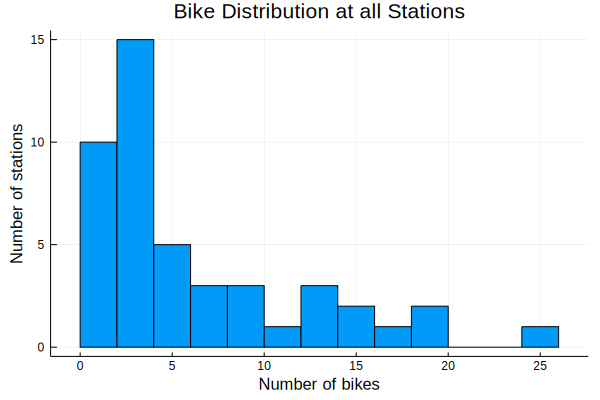

In [103]:
using Plots
histogram(value.(numBikes), bins=20, label="")
title!("Bike Distribution at all Stations")
xlabel!("Number of bikes")
ylabel!("Number of stations")

In [104]:
# Station wise allotment of bikes
using CSV, DataFrames
stationdata = CSV.read("station_data.csv", normalizenames=true)

# model 1 result
result_1 = DataFrame(station=String[], bikes=Int[])


println("Assignment for each station:")
println(" ")
for i in 1:numStations
    id = stations[i]
    row_no = findnext(stationdata[:, :Id] .== id, 1)
    name = stationdata[row_no, :Name]
    if  value.(numBikes[i])>=1
        push!(result_1, [name, sum(value.(numBikes[i]))])
    end
end

# sort by number of bikes
sort!(result_1, :bikes, rev=true)

show(result_1, allrows=true, summary=false)

Assignment for each station:
 

│ Row │ station                                       │ bikes │
│     │ String                                        │ Int64 │
├─────┼───────────────────────────────────────────────┼───────┤
│ 1   │ San Francisco Caltrain 2 (330 Townsend)       │ 25    │
│ 2   │ Spear at Folsom                               │ 19    │
│ 3   │ Harry Bridges Plaza (Ferry Building)          │ 18    │
│ 4   │ Powell at Post (Union Square)                 │ 17    │
│ 5   │ Steuart at Market                             │ 15    │
│ 6   │ Temporary Transbay Terminal (Howard at Beale) │ 14    │
│ 7   │ Powell Street BART                            │ 13    │
│ 8   │ San Francisco Caltrain (Townsend at 4th)      │ 13    │
│ 9   │ Market at 10th                                │ 12    │
│ 10  │ Civic Center BART (7th at Market)             │ 11    │
│ 11  │ Grant Avenue at Columbus Avenue               │ 9     │
│ 12  │ Commercial at Montgomery                      │ 8     │
│ 13  │ 

<a name="Code_2"></a>
## Model 2- To find the optimal number of bikes to Maximize Profit using Premium Pricing##

In [105]:
bikes = Model(with_optimizer(Gurobi.Optimizer,OutputFlag=0))

@variable(bikes, assignment[1:recordLength], Bin) #Variable to check if a bike is assigned to a trip, 1 if assigned
@variable(bikes, numBikes[1:numStations], Int)    #This is the initial placement of bikes at the stations

bikeCost = 1 # The cost per bike per day in USD
numBikesTracked = zeros(numStations) + numBikes #To find the total number of bikes allotted to a station at a particular time
profit = -sum(numBikes) * bikeCost * days  #The cost of the bike contributes negatively to the profit

@constraint(bikes, numBikesTracked .>= 0)

#The loop goes through each record to find out the requirement of a bike
for i in 1:recordLength
    # convert the station number to 1,2, ... numStations
    tripStart = stationsToNum[partialTripData[i, :Start_Station]] 
    tripEnd = stationsToNum[partialTripData[i, :End_Station]]
    
       # if it belongs to a station which is only a source or a destination, as no bikes need to be allotted for them
    if tripStart === nothing || tripEnd === nothing
        continue
    end
    
    numBikesTracked[tripStart] -= assignment[i] #If bikes leave from a station, availability decreases by 1
    numBikesTracked[tripEnd] += assignment[i]   #If bikes reaches a station, availability increases by 1
    
    # Introducing premium pricing for non-subscribers i.e customers @ $3 and $2 for subscriber requests
    if partialTripData[i, :Subscriber_Type] == "Customer"
        profit += 3 * assignment[i]
    else
        profit += 4 * assignment[i]
    end
    
    # It is not possible to remove a bike from an empty station or a station cannot have negative availability
    @constraint(bikes, numBikesTracked[tripStart] >= 0)

end

@objective(bikes, Max, profit);
optimize!(bikes);

Academic license - for non-commercial use only
Academic license - for non-commercial use only


In [106]:
# Out of 10,0000 requirements, how many requirements are satisfied
println("The number of trips which are satisfied through the allotment is " ,sum(value.(assignment)))

The number of trips which are satisfied through the allotment is 8911.0


In [107]:
#Profit across 10 days
println("The total profit across 10 days is \$ " ,JuMP.value(profit))

The total profit across 10 days is $ 31733.0


In [108]:
# Estimation of the total number of bikes required to maximize profit considering demand across 10 days
println("The number of bikes required to maximize profit is " ,sum(value.(numBikes)))

The number of bikes required to maximize profit is 301.0


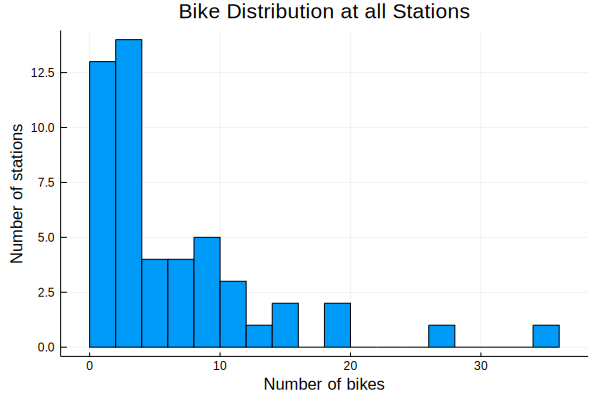

In [109]:
using Plots
histogram(value.(numBikes), bins=20, label="")
title!("Bike Distribution at all Stations")
xlabel!("Number of bikes")
ylabel!("Number of stations")

In [110]:
# To show the station wise bike distribution
using CSV
stationdata = CSV.read("station_data.csv", normalizenames=true)

# model 2 result
result_2 = DataFrame(station=String[], bikes=Int[])


println("Assignment for each station:")
println(" ")
for i in 1:numStations
    id = stations[i]
    row_no = findnext(stationdata[:, :Id] .== id, 1)
    name = stationdata[row_no, :Name]
    if  value.(numBikes[i])>=1
        push!(result_2, [name, sum(value.(numBikes[i]))])
    end
end

# sort by number of bikes
sort!(result_2, :bikes, rev=true)

show(result_2, allrows=true)

Assignment for each station:
 
46×2 DataFrame
│ Row │ station                                       │ bikes │
│     │ String                                        │ Int64 │
├─────┼───────────────────────────────────────────────┼───────┤
│ 1   │ San Francisco Caltrain 2 (330 Townsend)       │ 35    │
│ 2   │ Spear at Folsom                               │ 27    │
│ 3   │ Powell at Post (Union Square)                 │ 19    │
│ 4   │ Temporary Transbay Terminal (Howard at Beale) │ 18    │
│ 5   │ Grant Avenue at Columbus Avenue               │ 15    │
│ 6   │ 2nd at Folsom                                 │ 14    │
│ 7   │ Steuart at Market                             │ 12    │
│ 8   │ Market at 10th                                │ 11    │
│ 9   │ Civic Center BART (7th at Market)             │ 11    │
│ 10  │ Harry Bridges Plaza (Ferry Building)          │ 10    │
│ 11  │ San Jose Diridon Caltrain Station             │ 9     │
│ 12  │ Powell Street BART                            │ 9 

<a name="Code_3"></a>
## Model 3- To find the allotment at different stations considering there are 200 bikes ##

In [111]:
using XLSX
m=XLSX.readdata("Demand Matrix.xlsx", "Station Matrix Demand!A2:AC41")
m2=XLSX.readdata("Profit File.xlsx", "Profit File!A2:AN39");

# from 2014/Mar/1 to 2014/Aug/31
days = 183


183

In [112]:
source=m[2:40, 1]        #There are 40 source stations
destination=m[1, 2:29]   #There are 29 destination stations

ns=length(source)
nd=length(destination)

# the demand matrix
demand=m[2:40, 2:29]     #The demand from source to destination station

# the profit matrix
profit=m2[2:38, 2:40]    #The average profit for a trip from source to destination station

# Because the stations in the demand matrix does not match those in the profit matrix, we need to index them differently

# starting stations in the profit matrix i.e. 39, 41, 42, ...
profits=m2[2:38, 1]

# destination stations in the profit matrix
profitd=m2[1, 2:40]

# The matrix where there is no demand is being replaced with 0
for i in 1:ns
    for j in 1:nd
        if typeof(demand[i, j]) == Missing
            demand[i, j] = 0
        else
            # convert from string to float divide by days to get daily demand
            demand[i, j] = convert(Float32, demand[i, j]) / days
        end
    end
end

defaultProfit = 2
# If profit is missing for a trip, it is being replaced by minimum profit from trip i.e $2

for i in 1:37
    for j in 1:39
        if typeof(profit[i, j]) == Missing
            profit[i, j] = defaultProfit
        else
            profit[i, j] = convert(Float32, profit[i, j])
        end
    end
end

In [113]:
bikeModel = Model(with_optimizer(Gurobi.Optimizer, OutputFlag=0))

# the part that is within the demand
@variable(bikeModel, assignment[1:ns, 1:nd] >= 0, Int)

# max number of bikes
maxNumBikes = 200

@constraint(bikeModel, sum(assignment)<= maxNumBikes)


#The total number of bikes assigned should not exceed demand
@constraint(bikeModel, assignment.<= demand)

# the objective -- maximize the profit obtained
obj = 0

# calculate the total profit
# 
for i in 1:ns
    for j in 1:nd
        profiti=findnext(profits .== source[i], 1)
        profitj=findnext(profitd .== destination[j], 1)
        # Because the stations does not match,
        # a station in the profit matrix may
        # not appear in the demand matrix.
        # The same way around
        if typeof(profiti) == Nothing || 
            typeof(profitj) == Nothing
            p = 2
        else
            p = profit[profiti, profitj]
        end
        # TODO take bike life into consideration
        obj += assignment[i, j] * p
    end
end


@objective(bikeModel, Max, obj);
optimize!(bikeModel)

Academic license - for non-commercial use only
Academic license - for non-commercial use only


In [114]:
println("The Profit across the 183 day period is-\$ $(objective_value(bikeModel)*183)")
println("Total number of bikes: $(sum(value.(assignment)))")

The Profit across the 183 day period is-$ 78777.36128854752
Total number of bikes: 200.0


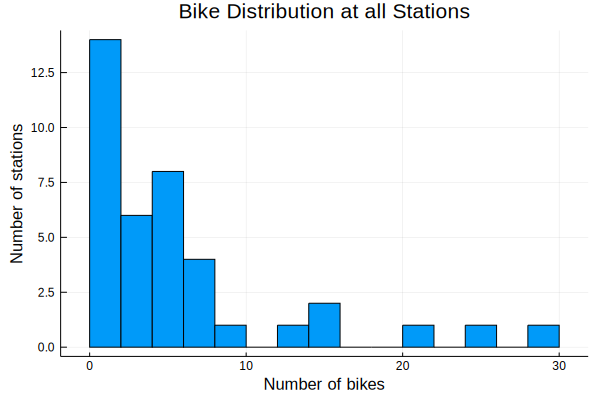

In [115]:
using Plots
bikesAssigned = sum(value.(assignment), dims=2)

histogram(bikesAssigned, bins=20, label="")
title!("Bike Distribution at all Stations")
xlabel!("Number of bikes")
ylabel!("Number of stations")

In [116]:
# To show the station wise bike distribution
using CSV
stationdata = CSV.read("station_data.csv", normalizenames=true)

# model 3 result
result_3 = DataFrame(station=String[], bikes=Int[])

println("Assignment for each station:")
println(" ")
for i in 1:ns
    id = source[i]
    row_no = findnext(stationdata[:, :Id] .== id, 1)
    name = stationdata[row_no, :Name]
    if  value.(numBikes[i])>=1
        push!(result_3, [name, sum(value.(assignment[i, :]))])
    end
end

# sort by number of bikes
sort!(result_3, :bikes, rev=true)

show(result_3, allrows=true, summary=false)

Assignment for each station:
 

│ Row │ station                                       │ bikes │
│     │ String                                        │ Int64 │
├─────┼───────────────────────────────────────────────┼───────┤
│ 1   │ Harry Bridges Plaza (Ferry Building)          │ 28    │
│ 2   │ San Francisco Caltrain (Townsend at 4th)      │ 24    │
│ 3   │ San Francisco Caltrain 2 (330 Townsend)       │ 21    │
│ 4   │ Steuart at Market                             │ 15    │
│ 5   │ 2nd at Townsend                               │ 13    │
│ 6   │ Beale at Market                               │ 7     │
│ 7   │ Market at 4th                                 │ 7     │
│ 8   │ Temporary Transbay Terminal (Howard at Beale) │ 6     │
│ 9   │ Market at Sansome                             │ 6     │
│ 10  │ Powell Street BART                            │ 5     │
│ 11  │ Howard at 2nd                                 │ 4     │
│ 12  │ 2nd at South Park                             │ 4     │
│ 13  │ 

In [117]:
# print Matrix for allotment

# a string mapping the index to the station name
sourceNames = String[]
destNames = String[]

for i in 1:ns
    id = source[i]
    row_no = findnext(stationdata[:, :Id] .== id, 1)
    name = stationdata[row_no, :Name]
    push!(sourceNames, name)
end

for i in 1:nd
    id = destination[i]
    row_no = findnext(stationdata[:, :Id] .== id, 1)
    name = stationdata[row_no, :Name]
    push!(destNames, name)
end

assignment_a3 = DataFrame()

assignment_a3[!, Symbol("Start/Dest")] = sourceNames

for i in 1:nd
    assignment_a3[!, Symbol(destNames[i])] = convert(Array{Int64, 1}, value.(assignment[:, i]))
end

# showall(assignment_a3[:, :])

io = IOBuffer()
ioctx = IOContext(io, :limit => false)
show(ioctx, MIME("text/html"), assignment_a3)
HTML(String(take!(io)))


,Start/Dest,San Antonio Shopping Center,Powell Street BART,Clay at Battery,Davis at Jackson,Commercial at Montgomery,Washington at Kearney,Post at Kearney,Embarcadero at Vallejo,Spear at Folsom,Harry Bridges Plaza (Ferry Building),Embarcadero at Folsom,Embarcadero at Bryant,Temporary Transbay Terminal (Howard at Beale),Beale at Market,5th at Howard,San Francisco City Hall,Golden Gate at Polk,Embarcadero at Sansome,2nd at Townsend,2nd at Folsom,Howard at 2nd,2nd at South Park,Townsend at 7th,South Van Ness at Market,Market at 10th,Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain 2 (330 Townsend),San Francisco Caltrain (Townsend at 4th)
,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,Powell Street BART,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,1
2,Clay at Battery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Davis at Jackson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3
4,Commercial at Montgomery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Washington at Kearney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Post at Kearney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Embarcadero at Vallejo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
8,Spear at Folsom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Harry Bridges Plaza (Ferry Building),0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,9,6,1,1,1,1,0,0,1,0,5


<a name="Code_4"></a>
## Model 4-To find the Optimal Number and Distribution of Bikes with limited Dock Capacity ##

In [118]:
m=XLSX.readdata("Demand Matrix.xlsx", "Station Matrix Demand!A2:AC41")
m2=XLSX.readdata("Profit File.xlsx", "Profit File!A2:AN39");

# from 2014/Mar/1 to 2014/Aug/31
days = 183

183

In [119]:
source=m[2:40, 1]
destination=m[1, 2:29]
ns=length(source)
nd=length(destination)

# the demand matrix
demand=m[2:40, 2:29]

# the profit matrix
profit=m2[2:38, 2:40]


# starting stations in the profit matrix
# i.e. 39, 41, 42, ...
profits=m2[2:38, 1]
# destination stations in the profit matrix
profitd=m2[1, 2:40]

# Generate the profit matrix from the data
# missing fields are filled with 0
for i in 1:ns
    for j in 1:nd
        if typeof(demand[i, j]) == Missing
            demand[i, j] = 0
        else
            # convert from string to float
            # divide by #days to get daily demand
            demand[i, j] = convert(Float32, demand[i, j]) / days
        end
    end
end

defaultProfit = 2.
# Similarly generate the profit matrix
# from the data, missing 
for i in 1:37
    for j in 1:39
        if typeof(profit[i, j]) == Missing
            profit[i, j] = defaultProfit
        else
            profit[i, j] = convert(Float32, profit[i, j])
        end
    end
end


In [120]:
bikeModel = Model(with_optimizer(Gurobi.Optimizer,OutputFlag=0))

# The variable for assigment of bikes for a pair of source and destination stations
@variable(bikeModel, assignment[1:ns, 1:nd] >= 0, Int)

# max number of bikes
maxNumBikes = 200

@constraint(bikeModel, sum(assignment)<= maxNumBikes) #Total bikes alloted cannot exceed max bike available

# the assignment should not exceed the demand of a particular pair of stations
@constraint(bikeModel, assignment.<= demand)

obj = 0

# To evaluate the profit
for i in 1:ns
    for j in 1:nd
        profiti=findnext(profits .== source[i], 1)
        profitj=findnext(profitd .== destination[j], 1)
        # Because the stations does not match,
        # a station in the profit matrix may
        # not appear in the demand matrix.
        # The same way around
        if typeof(profiti) == Nothing || 
            typeof(profitj) == Nothing
            p = 2
        else
            p = profit[profiti, profitj]
        end
            obj += assignment[i, j] * p
    end
end

# The sum of bikes alloted to a station cannot exceed the dock capacity
dockCapacity = 15
@constraint(bikeModel, sum(assignment, dims=1) .<= dockCapacity)
@constraint(bikeModel, sum(assignment, dims=2) .<= dockCapacity)

@objective(bikeModel, Max, obj);
optimize!(bikeModel)

Academic license - for non-commercial use only
Academic license - for non-commercial use only


In [121]:
println("The Profit across the 183 day period is-\$ $(objective_value(bikeModel)*183)")
println("Total number of bikes: $(sum(value.(assignment)))")

The Profit across the 183 day period is-$ 63847.19860124588
Total number of bikes: 161.0


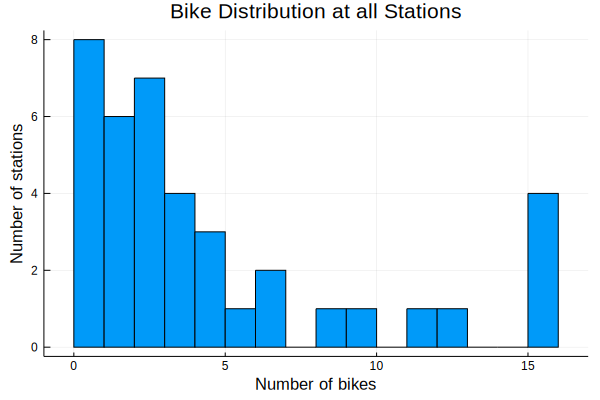

In [122]:
using Plots
bikesAssigned = sum(value.(assignment), dims=2)

histogram(bikesAssigned, bins=20, label="")
title!("Bike Distribution at all Stations")
xlabel!("Number of bikes")
ylabel!("Number of stations")

In [123]:
# print assignment information
using CSV
stationdata = CSV.read("station_data.csv", normalizenames=true)

# model 3 result
result_3 = DataFrame(station=String[], bikes=Int[])

println("Assignment for each station:")
println(" ")
for i in 1:ns
    id = source[i]
    row_no = findnext(stationdata[:, :Id] .== id, 1)
    name = stationdata[row_no, :Name]
    if  value.(numBikes[i])>=1
        push!(result_3, [name, sum(value.(assignment[i, :]))])
    end
end

# sort by number of bikes
sort!(result_3, :bikes, rev=true)

show(result_3, allrows=true, summary=false)

Assignment for each station:
 

│ Row │ station                                       │ bikes │
│     │ String                                        │ Int64 │
├─────┼───────────────────────────────────────────────┼───────┤
│ 1   │ Harry Bridges Plaza (Ferry Building)          │ 15    │
│ 2   │ San Francisco Caltrain (Townsend at 4th)      │ 15    │
│ 3   │ San Francisco Caltrain 2 (330 Townsend)       │ 15    │
│ 4   │ 2nd at Townsend                               │ 12    │
│ 5   │ Steuart at Market                             │ 11    │
│ 6   │ Market at Sansome                             │ 9     │
│ 7   │ Temporary Transbay Terminal (Howard at Beale) │ 6     │
│ 8   │ Grant Avenue at Columbus Avenue               │ 6     │
│ 9   │ Powell Street BART                            │ 5     │
│ 10  │ Townsend at 7th                               │ 4     │
│ 11  │ Market at 4th                                 │ 4     │
│ 12  │ Embarcadero at Folsom                         │ 3     │
│ 13  │ 

In [124]:
# Allotment Matrix

assignment_a4 = DataFrame()

assignment_a4[!, Symbol("Start/Dest")] = sourceNames

for i in 1:nd
    assignment_a4[!, Symbol(destNames[i])] = convert(Array{Int64, 1}, value.(assignment[:, i]))
end

# show(assignment_a4, allrows=true, allcols=true, summary=false)

io = IOBuffer()
ioctx = IOContext(io, :limit => false)
show(ioctx, MIME("text/html"), assignment_a4)
HTML(String(take!(io)))

,Start/Dest,San Antonio Shopping Center,Powell Street BART,Clay at Battery,Davis at Jackson,Commercial at Montgomery,Washington at Kearney,Post at Kearney,Embarcadero at Vallejo,Spear at Folsom,Harry Bridges Plaza (Ferry Building),Embarcadero at Folsom,Embarcadero at Bryant,Temporary Transbay Terminal (Howard at Beale),Beale at Market,5th at Howard,San Francisco City Hall,Golden Gate at Polk,Embarcadero at Sansome,2nd at Townsend,2nd at Folsom,Howard at 2nd,2nd at South Park,Townsend at 7th,South Van Ness at Market,Market at 10th,Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain 2 (330 Townsend),San Francisco Caltrain (Townsend at 4th)
,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,Powell Street BART,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,1
2,Clay at Battery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Davis at Jackson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3
4,Commercial at Montgomery,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Washington at Kearney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Post at Kearney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Embarcadero at Vallejo,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
8,Spear at Folsom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Harry Bridges Plaza (Ferry Building),0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,4,0,1,1,1,1,0,0,1,0,2


<a name="Code_5"></a>
## Model 5-To find the Optimal number and Distribution of Bikes with Dock expansion at an additional cost ##

In [125]:
using Gurobi, JuMP, XLSX
m=XLSX.readdata("Demand Matrix.xlsx", "Station Matrix Demand!A2:AC41")
m2=XLSX.readdata("Profit File.xlsx", "Profit File!A2:AN39");

# from 2015/Mar/1 to 2015/Aug/31
days = 183

183

In [126]:
source=m[2:40, 1]
destination=m[1, 2:29]
ns=length(source)
nd=length(destination)

# array of all stations
stations = []

for i in source
    if findnext(stations .== i, 1) === nothing
        push!(stations, i)
    end
end

for i in destination
    if findnext(stations .== i, 1) == nothing
        push!(stations, i)
    end
end

stationToIdx = Dict()
for i in 1:length(stations)
    stationToIdx[stations[i]] = i
end


# the demand matrix
demand=m[2:40, 2:29]

# the profit matrix
profit=m2[2:38, 2:40]

# Because the stations in the demand matrix does
# not match those in the profit matrix, we need to
# index them differently
#
# starting stations in the profit matrix
# i.e. 39, 41, 42, ...
profits=m2[2:38, 1]
# destination stations in the profit matrix
profitd=m2[1, 2:40]

# Generate the profit matrix from the data
# missing fields are filled with 0
for i in 1:ns
    for j in 1:nd
        if typeof(demand[i, j]) == Missing
            demand[i, j] = 0
        else
            # convert from string to float
            # divide by #days to get daily demand
            demand[i, j] = convert(Float32, demand[i, j]) / days
        end
    end
end

defaultProfit = 2.
# Similarly generate the profit matrix
# from the data, missing 
for i in 1:37
    for j in 1:39
        if typeof(profit[i, j]) == Missing
            profit[i, j] = defaultProfit
        else
            profit[i, j] = convert(Float32, profit[i, j])
        end
    end
end

bikeValue = 200;

In [127]:
bikeModel = Model(with_optimizer(Gurobi.Optimizer,OutputFlag=0))

# The variable for assigment of bikes for a pair of source and destination stations
@variable(bikeModel, assignment[1:ns, 1:nd] >= 0, Int)

# max number of bikes
maxNumBikes = 200

@constraint(bikeModel, sum(assignment)<= maxNumBikes) #Total bikes alloted cannot exceed max bike available

# the assignment should not exceed the demand of a particular pair of stations
@constraint(bikeModel, assignment.<= demand)

# calculate the profit
obj = 0
for i in 1:ns
    for j in 1:nd
        profiti=findnext(profits .== source[i], 1)
        profitj=findnext(profitd .== destination[j], 1)
        # Because the stations does not match,
        # a station in the profit matrix may
        # not appear in the demand matrix.
        # The same way around
        if typeof(profiti) == Nothing || 
            typeof(profitj) == Nothing
            p = 2
        else
            p = profit[profiti, profitj]
        end
            obj += assignment[i, j] * p * 180
    end
end

# BEGIN constraint: a source/destination station can have a maximum dock size of 15 by default
initialDockCapacity = 15

# cost to expand the dock, could be tweaked
expansionCost = 200 / days

@variable(bikeModel, extraDocks[1:length(stations)] >= 0, Int)

# new capacity
dockCapacity = extraDocks .* 4 .+ initialDockCapacity

obj -= expansionCost * sum(extraDocks)

# the total number of leaving bikes
for i in 1:ns
    dock_no = stationToIdx[source[i]]
    @constraint(bikeModel, sum(assignment[i, :]) <= dockCapacity[dock_no])
end

# the total number of arriving bikes
for i in 1:nd
    dock_no = stationToIdx[destination[i]]
    @constraint(bikeModel, sum(assignment[:, i]) <= dockCapacity[dock_no])
end

@objective(bikeModel, Max, obj);
optimize!(bikeModel)

Academic license - for non-commercial use only
Academic license - for non-commercial use only


In [128]:
println("The Profit across the 183 day period is-\$ $(objective_value(bikeModel))")
println("Total number of bikes: $(sum(value.(assignment)))")

The Profit across the 183 day period is-$ 77466.10389719895
Total number of bikes: 200.0


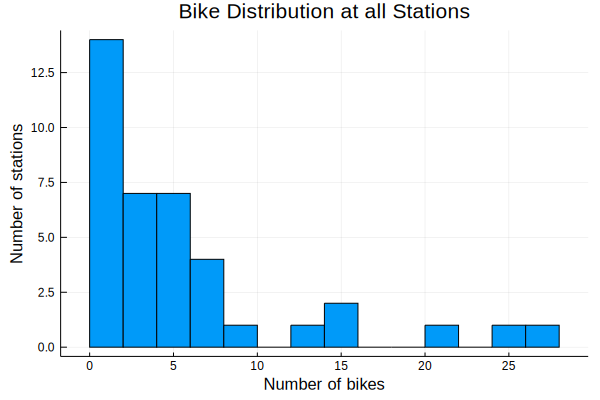

In [129]:
using Plots
bikesAssigned = sum(value.(assignment), dims=2)
histogram(bikesAssigned, bins=20, label="")
title!("Bike Distribution at all Stations")
xlabel!("Number of bikes")
ylabel!("Number of stations")

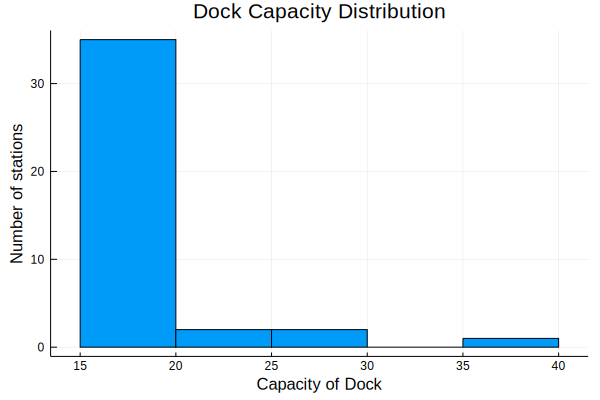

In [130]:
using Plots
docksAssigned = sum(value.(dockCapacity), dims=2)
histogram(docksAssigned, bins=10, label="")
title!("Dock Capacity Distribution")
xlabel!("Capacity of Dock")
ylabel!("Number of stations")

In [131]:
# Bike Distribution Station-wise

result_5 = DataFrame(station=String[], bikes=Int[])

println("Assignment for each station:")
for i in 1:ns
    id = source[i]
    row_no = findnext(stationdata[:, :Id] .== id, 1)
    name = stationdata[row_no, :Name]
    if sum(value.(assignment[i, :]))>=1
        push!(result_5, [name, sum(value.(assignment[i, :]))])
    end
end

# sort by number of bikes
sort!(result_5, :bikes, rev=true)

show(result_5, allrows=true, summary=false)

Assignment for each station:

│ Row │ station                                       │ bikes │
│     │ String                                        │ Int64 │
├─────┼───────────────────────────────────────────────┼───────┤
│ 1   │ Harry Bridges Plaza (Ferry Building)          │ 27    │
│ 2   │ San Francisco Caltrain (Townsend at 4th)      │ 24    │
│ 3   │ San Francisco Caltrain 2 (330 Townsend)       │ 21    │
│ 4   │ Embarcadero at Sansome                        │ 15    │
│ 5   │ Steuart at Market                             │ 15    │
│ 6   │ 2nd at Townsend                               │ 13    │
│ 7   │ Embarcadero at Bryant                         │ 8     │
│ 8   │ Beale at Market                               │ 7     │
│ 9   │ Market at 4th                                 │ 7     │
│ 10  │ Temporary Transbay Terminal (Howard at Beale) │ 6     │
│ 11  │ Market at Sansome                             │ 6     │
│ 12  │ Powell Street BART                            │ 5     │
│ 13  │ Da

In [132]:
# Dock Capacity for different stations

using CSV
stations = CSV.read("station_data.csv", normalizenames=true)

result_dock = DataFrame(station=String[], capacity=Int[])

println("Dock capacity for each station:")
println(" ")
for i in 1:ns
    id = source[i]
    row_no = findnext(stations[:, :Id] .== id, 1)
    name = stations[row_no, :Name]
    push!(result_dock, [name, value(dockCapacity[i])])
end

# sort by number of bikes
sort!(result_dock, :capacity, rev=true)
    
show(result_dock, allrows=true)

Dock capacity for each station:
 
39×2 DataFrame
│ Row │ station                                       │ capacity │
│     │ String                                        │ Int64    │
├─────┼───────────────────────────────────────────────┼──────────┤
│ 1   │ San Francisco Caltrain (Townsend at 4th)      │ 39       │
│ 2   │ Harry Bridges Plaza (Ferry Building)          │ 27       │
│ 3   │ Embarcadero at Sansome                        │ 27       │
│ 4   │ 2nd at Townsend                               │ 23       │
│ 5   │ San Francisco Caltrain 2 (330 Townsend)       │ 23       │
│ 6   │ Townsend at 7th                               │ 19       │
│ 7   │ Powell Street BART                            │ 15       │
│ 8   │ Clay at Battery                               │ 15       │
│ 9   │ Davis at Jackson                              │ 15       │
│ 10  │ Commercial at Montgomery                      │ 15       │
│ 11  │ Washington at Kearney                         │ 15       │
│ 12  │ Post 

In [133]:
# Assignment Matrix for the stations

assignment_a5 = DataFrame()

assignment_a5[!, Symbol("Start/Dest")] = sourceNames

for i in 1:nd
    assignment_a5[!, Symbol(destNames[i])] = convert(Array{Int64, 1}, value.(assignment[:, i]))
end

# show(assignment_a5, allrows=true, allcols=true, summary=false)


io = IOBuffer()
ioctx = IOContext(io, :limit => false)
show(ioctx, MIME("text/html"), assignment_a5)
HTML(String(take!(io)))

,Start/Dest,San Antonio Shopping Center,Powell Street BART,Clay at Battery,Davis at Jackson,Commercial at Montgomery,Washington at Kearney,Post at Kearney,Embarcadero at Vallejo,Spear at Folsom,Harry Bridges Plaza (Ferry Building),Embarcadero at Folsom,Embarcadero at Bryant,Temporary Transbay Terminal (Howard at Beale),Beale at Market,5th at Howard,San Francisco City Hall,Golden Gate at Polk,Embarcadero at Sansome,2nd at Townsend,2nd at Folsom,Howard at 2nd,2nd at South Park,Townsend at 7th,South Van Ness at Market,Market at 10th,Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain 2 (330 Townsend),San Francisco Caltrain (Townsend at 4th)
,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,Powell Street BART,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,1
2,Clay at Battery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Davis at Jackson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3
4,Commercial at Montgomery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Washington at Kearney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Post at Kearney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Embarcadero at Vallejo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
8,Spear at Folsom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Harry Bridges Plaza (Ferry Building),0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,9,6,1,0,1,1,0,0,1,0,5


<a id='4Results'></a>

## 4. Results ##

From Model 1, we get to know that the optimal number of bikes required for fulfilling demand and it turns out to be 267. The profit which the company can earn is \\$23,832.00. However, the company can explore premium pricing for its subscribers and customers which is explored in Model 2.

From Model 2, we take into account the increase in profit through premium pricing for customers who are not subscribers. The total requirement of bikes to take care of this demand comes out to be 301 since the optimization model will try to fulfill all demand due to the higher possibility of reaping profits. The number of bikes increases to 301 and the profit which the company can earn is \\$31,733 i.e an increase of 33% in profit. 

However, all organizations have limited resources and follow a risk-averse path of expansion due to uncertainties in demand. The company in question had the resources available for investment in 200 bikes across a period of four years.

From Model 3, we find out the optimal distribution of bikes among the different docks to ensure Bykers can maximize its profit. All 200 bikes are utilized and the distribution is obtained. Considering the average demand, profit from the 183 day period selected from March to August 2015 comes out to be \\$ 78777.36.

Another critical factor for bike-sharing companies is to decide the capacity of the docks. The expansion of capacity requires capital for setting up and for space.  

From Model 4, we get the optimal arrangement of bikes if there is a constraint on the maximum dock size as 15. The distribution of bikes is obtained and the number of bikes used is only 161. Thus, the organization should invest in dock expansion so that it can utilize all its cycles. The profit for the same period comes out to be \\$ 63847.19.

From Model 5, we explore the possibility of expansion of docks for a price and find out the optimal arrangement of bikes and dock sizes at different locations. In this case, the total allotment of bikes increases to 200 again and the profit comes out to be \\$ 77466.10. 

<a id='5Futurework'></a>
## 5. Future work ##

In our optimization model, we have considered that demand can be met only by the initial arrangement of bikes at a particular station. However, we can also consider the possibility of rearrangement of bikes at certain points during the day to satisfy the hourly changes in demand from different points.

The demand which has been considered is also deterministic. More advanced models can be made which takes into account the real-time demand and/or using the existing demand to forecast future demand using machine learning forecasting models. Biking is also a seasonal activity even though the seasonal effect is much lesser in California where it's fairly warm throughout the year. However, in many other states in the US, the usage during the winter will be drastically different. The lack of revenue during the period should be taken into account.

<a id='6Author'></a>
## 6. Author Contributions

#### 1. Modelling  
Student Ruohui: 40  %  
Student Maitreyi: 20 %  
Student Rohit: 40 %  

  
#### 2. Analysis  
Student Ruohui: 20  %  
Student Maitreyi: 65 %  
Student Rohit: 15 %   


#### 3. Data Gathering  
Student Ruohui: 20  %  
Student Maitreyi: 30 %  
Student Rohit: 50 %  


#### 4. Software Implementation  
Student Ruohui: 70  %  
Student Maitreyi: 10 %  
Student Rohit: 20 %  

#### 5. Report writing    
Student Ruohui: 20  %  
Student Maitreyi: 40 %  
Student Rohit: 40 % 


<a name="7Peer"></a>
## 7. Peer Review Feedback ##

As per the feedback from the peer review, we have added a revenue parameter $p_{i,j}$ between each source and destination station and the objective is to maximize revenue based on availability of bikes instead of satisfying demand.

We have not considered the suggestion of taking into account the seasonal demand variation of bikes and add bikes to the system for satisfying sudden demands, but this can be explored as a future work opportunity. Instead we have chosen to work on constraints with dock capacity, since it requires investment.

We have included only one kind of bike to the system and not considered the possibility of inclusion of electric bikes since we did not get the data. Also most companies try to deal with one kind of product to enhance economies of scale and reduce maintenance costs associated with using different kinds of inventory.